# Scalling in neural network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:/ml_assets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

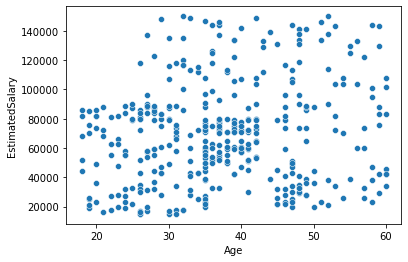

In [3]:
sns.scatterplot(x = df.Age,y=df.EstimatedSalary,)

In [4]:
x = df.drop(columns=['User ID','Purchased','Gender'])
y = df['Purchased']

In [5]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [7]:
#spliting the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [9]:
# model building

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(132,activation='relu',input_dim=2,))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 132)               396       
                                                                 
 dense_1 (Dense)             (None, 1)                 133       
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 53ms/step - loss: 2474.5630 - accuracy: 0.3469 - val_loss: 306.0020 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 795.1849 - accuracy: 0.6531 - val_loss: 807.6859 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 389.6797 - accuracy: 0.4344 - val_loss: 213.6853 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 180.1721 - accuracy: 0.6094 - val_loss: 22.3504 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 59.9312 - accuracy: 0.4531 - val_loss: 40.7674 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 28.7341 - accuracy: 0.5094 - val_loss: 10.1401 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 23.3973 - accuracy: 0.4781 - val_loss: 39.3008 - val_accurac

Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 53.3349 - accuracy: 0.4969 - val_loss: 53.1102 - val_accuracy: 0.4000
Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 92.2048 - accuracy: 0.5219 - val_loss: 94.5245 - val_accuracy: 0.4000
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 47.9951 - accuracy: 0.4781 - val_loss: 45.3854 - val_accuracy: 0.4000
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 58.8105 - accuracy: 0.5156 - val_loss: 101.4733 - val_accuracy: 0.6000
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 95.8705 - accuracy: 0.5031 - val_loss: 35.4999 - val_accuracy: 0.6000
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 71.7972 - accuracy: 0.5344 - val_loss: 102.7239 - val_accuracy: 0.4000
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 94.2994 - accuracy: 0.4969 - val_loss: 58.7571 - val_accurac

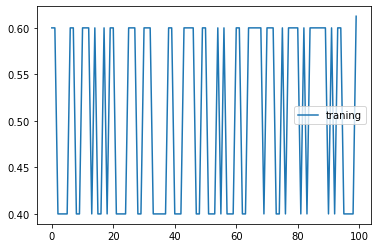

In [15]:
plt.plot(history.history['val_accuracy'],label="traning" )

plt.legend()
plt.show()

# scalling the data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<AxesSubplot:>

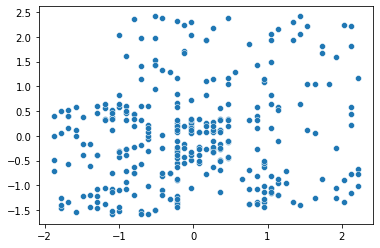

In [17]:
sns.scatterplot(x = x_train_scaled[:,0],y = x_train_scaled[:,1])

In [18]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.6402 - accuracy: 0.7437 - val_loss: 0.6197 - val_accuracy: 0.7750
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5922 - accuracy: 0.7969 - val_loss: 0.5805 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.8250 - val_loss: 0.5471 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5163 - accuracy: 0.8344 - val_loss: 0.5189 - val_accuracy: 0.8000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4855 - accuracy: 0.8406 - val_loss: 0.4944 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8500 - val_loss: 0.4729 - val_accuracy: 0.8375
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8531 - val_loss: 0.4540 - val_accuracy: 0.8375
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2135 - accuracy: 0.9250 - val_loss: 0.3785 - val_accuracy: 0.8625
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2131 - accuracy: 0.9250 - val_loss: 0.3787 - val_accuracy: 0.8625
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2130 - accuracy: 0.9250 - val_loss: 0.3757 - val_accuracy: 0.8625
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2129 - accuracy: 0.9250 - val_loss: 0.3789 - val_accuracy: 0.8625
Epoch 63/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2124 - accuracy: 0.9281 - val_loss: 0.3805 - val_accuracy: 0.8625
Epoch 64/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2132 - accuracy: 0.9281 - val_loss: 0.3766 - val_accuracy: 0.8625
Epoch 65/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2120 - accuracy: 0.9281 - val_loss: 0.3803 - val_accuracy: 0.8625
Epoch 

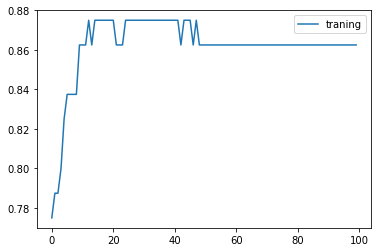

In [20]:
plt.plot(history.history['val_accuracy'],label="traning" )

plt.legend()
plt.show()